# Exploration Archive
*This notebook contains exploratory analysis, initial experiments, and testing code not included in the final pipeline. It serves as a record of experimentation during the development of ShowbizPredictor*


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load a sample of the dataset (first 100,000 rows)
df = pd.read_csv('../../data/tmdb_movie_dataset.csv', nrows=100000)
print(f"Sample dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Sample dataset loaded: 100000 rows, 24 columns


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [3]:
# Info and summary stats
df.info()
df.describe()

# Missing values
missing = df.isnull().sum()
print("Columns with missing values:\n", missing[missing > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    100000 non-null  int64  
 1   title                 100000 non-null  object 
 2   vote_average          100000 non-null  float64
 3   vote_count            100000 non-null  int64  
 4   status                100000 non-null  object 
 5   release_date          99938 non-null   object 
 6   revenue               100000 non-null  int64  
 7   runtime               100000 non-null  int64  
 8   adult                 100000 non-null  bool   
 9   backdrop_path         83953 non-null   object 
 10  budget                100000 non-null  int64  
 11  homepage              19451 non-null   object 
 12  imdb_id               98991 non-null   object 
 13  original_language     100000 non-null  object 
 14  original_title        100000 non-null  object 
 15  o

In [4]:
columns_to_keep = [
    'id', 'title', 'vote_average', 'vote_count', 'status',
    'release_date', 'revenue', 'runtime', 'adult'
]
df = df[columns_to_keep]

# Filter for released and non-adult movies
df = df[(df['status'] == 'Released') & (df['adult'] == False)]
print(f"Filtered dataset shape: {df.shape}")

Filtered dataset shape: (99645, 9)


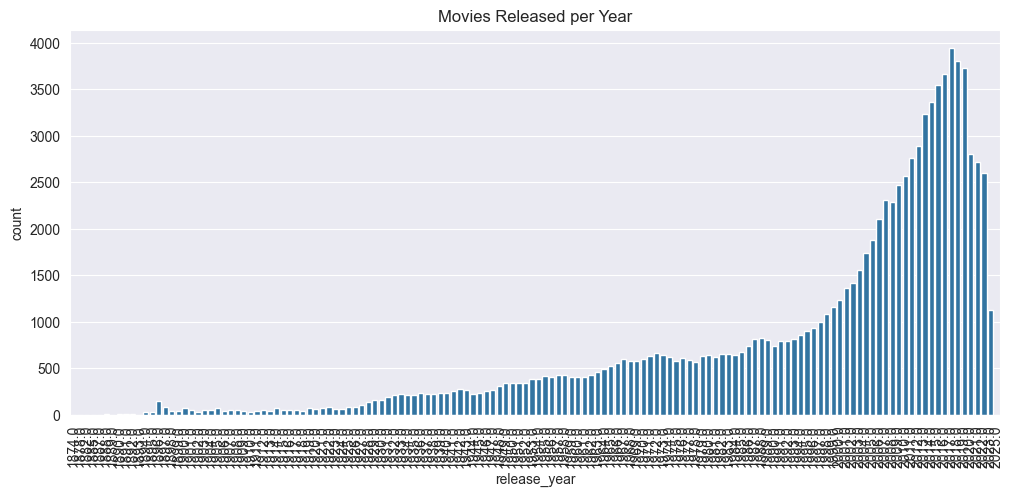

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_quarter'] = df['release_date'].dt.quarter

# Plot movies released per year
plt.figure(figsize=(12,5))
sns.countplot(x='release_year', data=df, order=sorted(df['release_year'].dropna().unique()))
plt.title('Movies Released per Year')
plt.xticks(rotation=90)
plt.show()

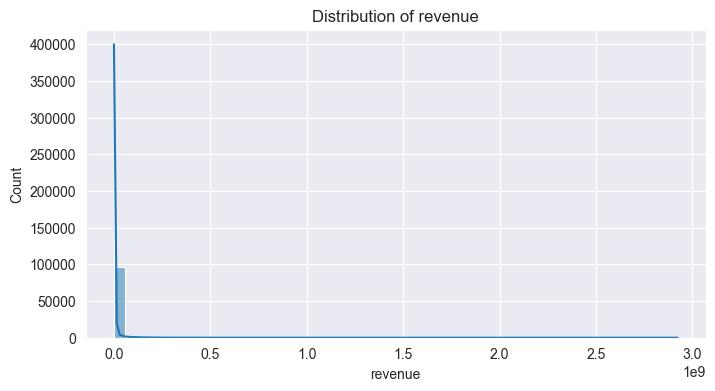

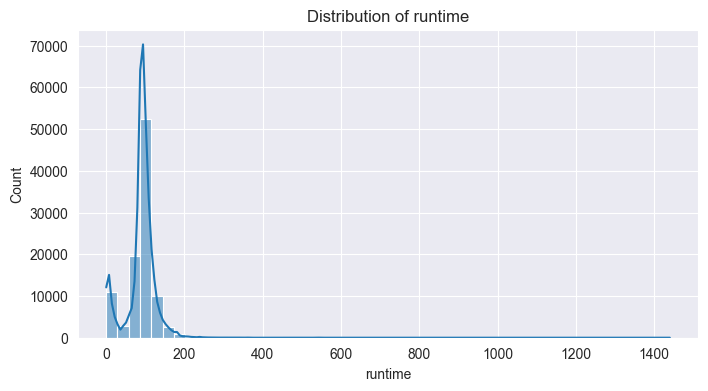

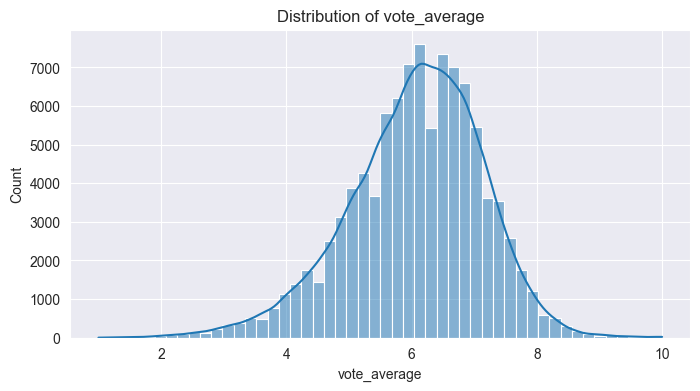

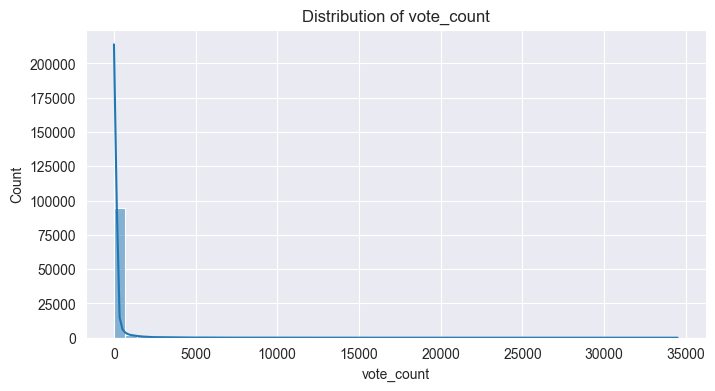

In [6]:
numeric_cols = ['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), bins=50, kde=True)
        plt.title(f'Distribution of {col}')
        plt.show()

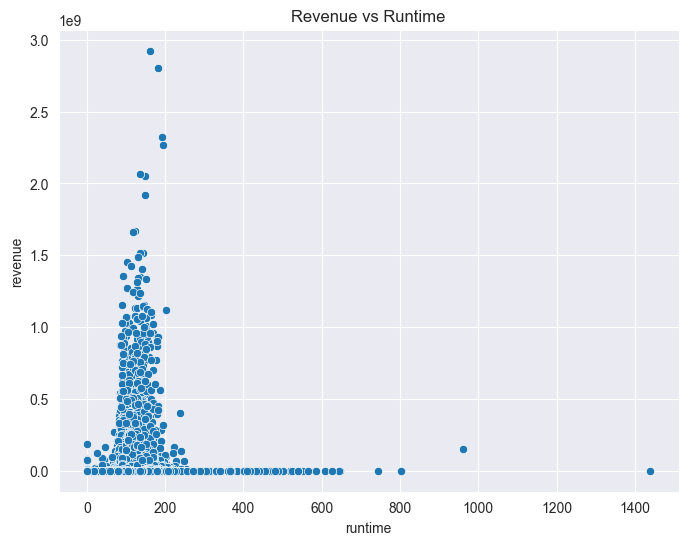

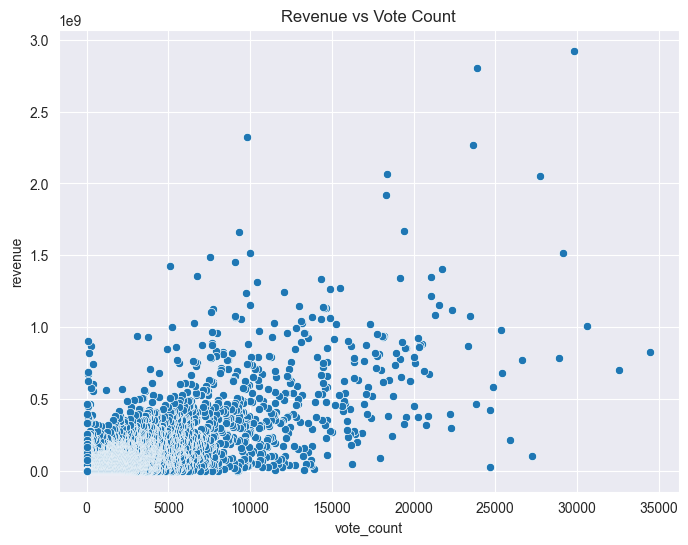

In [7]:
if 'budget' in df.columns and 'revenue' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='budget', y='revenue', data=df)
    plt.title('Revenue vs Budget')
    plt.show()

if 'runtime' in df.columns and 'revenue' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='runtime', y='revenue', data=df)
    plt.title('Revenue vs Runtime')
    plt.show()

if 'vote_count' in df.columns and 'revenue' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='vote_count', y='revenue', data=df)
    plt.title('Revenue vs Vote Count')
    plt.show()

In [8]:
# Map months to seasons
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return np.nan

df['release_season'] = df['release_month'].apply(month_to_season)

# Quick check
df['release_season'].value_counts()

release_season
Fall      30038
Winter    25933
Spring    22865
Summer    20749
Name: count, dtype: int64

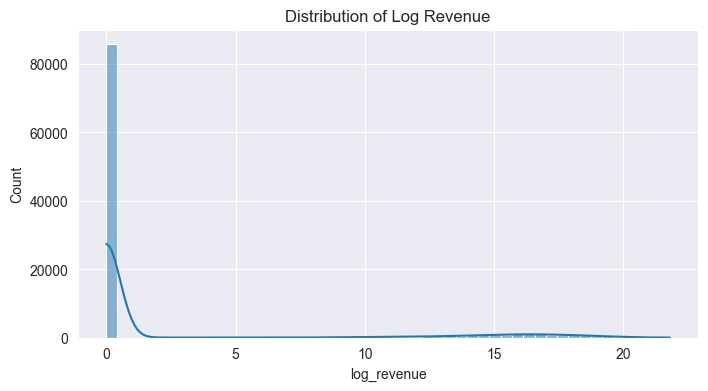

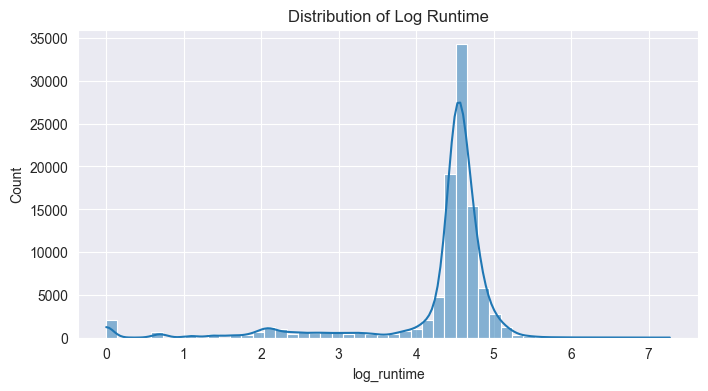

In [9]:
# Log-transform revenue and runtime to reduce skew
df['log_revenue'] = np.log1p(df['revenue'])
df['log_runtime'] = np.log1p(df['runtime'])

# Check distributions
plt.figure(figsize=(8,4))
sns.histplot(df['log_revenue'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log Revenue')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['log_runtime'].dropna(), bins=50, kde=True)
plt.title('Distribution of Log Runtime')
plt.show()

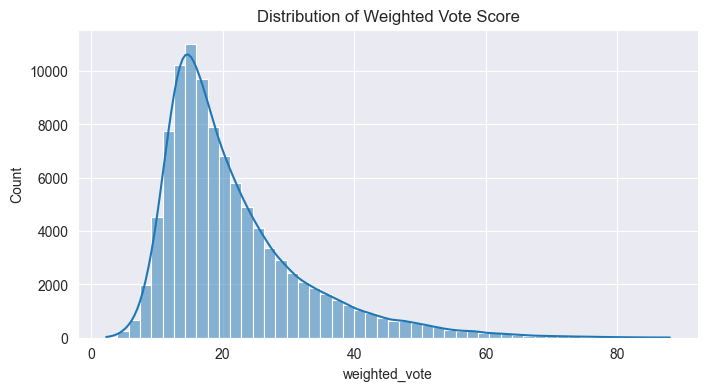

In [10]:
# Weighted vote score: vote_average weighted by log of vote_count
df['weighted_vote'] = df['vote_average'] * np.log1p(df['vote_count'])

plt.figure(figsize=(8,4))
sns.histplot(df['weighted_vote'].dropna(), bins=50, kde=True)
plt.title('Distribution of Weighted Vote Score')
plt.show()

In [11]:
# Check final feature columns
feature_cols = [
    'vote_average', 'vote_count', 'runtime', 'release_year',
    'release_month', 'release_quarter', 'release_season',
    'log_runtime', 'weighted_vote'
]

print("Feature columns ready for modeling:")
print(feature_cols)

# Quick head of transformed dataset
df[feature_cols + ['revenue', 'log_revenue']].head()

Feature columns ready for modeling:
['vote_average', 'vote_count', 'runtime', 'release_year', 'release_month', 'release_quarter', 'release_season', 'log_runtime', 'weighted_vote']


,vote_average,vote_count,runtime,release_year,release_month,release_quarter,release_season,log_runtime,weighted_vote,revenue,log_revenue
0,8.364,34495,148,2010.0,7.0,3.0,Summer,5.003946,87.392079,825532764,20.531540
1,8.417,32571,169,2014.0,11.0,4.0,Fall,5.135798,87.462800,701729206,20.369058
2,8.512,30619,152,2008.0,7.0,3.0,Summer,5.030438,87.923927,1004558444,20.727814
3,7.573,29815,162,2009.0,12.0,4.0,Winter,5.093750,78.023108,2923706026,21.796118
4,7.710,29166,143,2012.0,4.0,2.0,Spring,4.969813,79.264916,1518815515,21.141197
